In [1]:
import pandas as pd
import math
import os
import numpy as np
from glob import glob

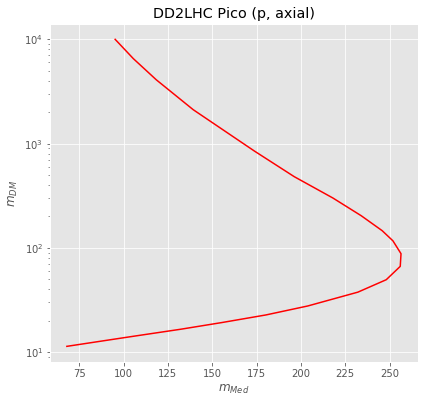

In [2]:
# whole bunch of defintions
gDM = 1.
gu = gd = gs = 0.25  # set to DM LHC WG recommendations
mn, conv_units = 0.938, 2.568 * pow(10., 27.)
Delta_d_p, Delta_u_p, Delta_s_p = -0.42, 0.85, -0.08

DATA_LOCATION = 'data/'
DATA_FILE_EXT = ''




def dataset_names():
    datasets = glob('data/*.dat')
    for dataset in datasets:
        dataset = dataset.replace(DATA_LOCATION, '')
        dataset = dataset.replace(DATA_FILE_EXT, '')
        yield dataset

def get_datasets():
    return list(dataset_names())



def dd2lhc(df):
    gu = gd = gs = 0.25  
    f = abs(gDM * (gu * Delta_u_p + gd * Delta_d_p + gs * Delta_s_p))  #for p
#    f = abs(gDM * (gu * Delta_u_n + gd * Delta_d_n + gs * Delta_s_n))  #for n


    # calculate mu
    df['mu_nDM'] = mn * df['m_DM'] / (mn + df['m_DM'])
    # apply conversion units to sigma
    df['sigma'] = df['sigma'] * conv_units
    df['sigma_in_GeV'] = df['sigma']

    # calculate m_mediator
    df['m_med'] = np.power(f * df['mu_nDM'], 0.5) / np.power(math.pi * df['sigma'] / 3., 0.25)

def lhc2dd(df):
    gu = gd = gs = 0.25
    f = abs(gDM * (gu * Delta_u_p + gd * Delta_d_p + gs * Delta_s_p))  #for p
    # calculate mu
    df['mu_nDM'] = mn * df['m_DM'] / (mn + df['m_DM'])

    # apply conversion units to sigma
    df['sigma_in_GeV'] = 3 * np.power(f * df['mu_nDM'], 2.) / (math.pi * np.power(df['m_med'], 4.))
    df['sigma'] = df['sigma_in_GeV']/conv_units



def get_data(dataset='PICOSD_p'):
    dataset_type = 'DD'
    if dataset in ['DD_2_LHC_n', 'DD_2_LHC_p', 'mMedmDM1', 'mMedmDM2']:
        dataset_type = 'LHC'
    input_file = os.path.join(DATA_LOCATION, dataset + DATA_FILE_EXT)

    names = ['m_DM', 'sigma']
    if dataset_type == 'LHC':
        names = ['m_med', 'm_DM']
    df = pd.read_csv(input_file, delim_whitespace=True,
                     names=names)
    label = os.path.basename(input_file).split('.')[0]
    df.insert(0, 'label', label)
    if dataset_type == 'DD':
        dd2lhc(df)
    elif dataset_type == 'LHC':
        lhc2dd(df)
    # # apply conversion units to sigma
    # df['sigma'] = df['sigma'] * conv_units
    # # calculate mu
    # df['mu_nDM'] = mn * df['m_DM'] / (mn + df['m_DM'])
    # # calculate m_mediator
    # df['m_med'] = pow(f * df['mu_nDM'], 0.5) / \
    #     pow(math.pi * df['sigma'] / 3., 0.25)
    return df


def get_figure(df):
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(6.5875, 6.2125))
    ax = fig.add_subplot(111)
    ax.set_title("DD2LHC Pico (p, axial)")
    ax.set_xlabel(r'$m_{Med}$')
    ax.set_ylabel(r'$m_{DM}$')
    ax.semilogy(df['m_med'], df['m_DM'], color='red')
    plt.show()
    fig.savefig('pico2plane2.png')
    return fig
   
if __name__ == '__main__':
    df = get_data('LHC_2_DD_p.dat')
    #print df
    get_figure(df)